# Занятие 8. АБ-тестирование (проверяем все в онлайн-экспериментах)

**План занятия**

1. вспоминаем самое первое занятие
2. "типичное" устройство АБ-тестов
3. метрики для сравнения
4. оценка размера выборки ДО проведения эксперимента
5. параметрические и непараметрические критерии

Пример как может выглядеть решение задачи бизнеса с помощью ML

<img src="https://drive.google.com/uc?export=view&id=17FW2LIObiINyrov5qN4S-yHzTDNitZ3s" width=800>

Если же сделать процесс более "линейным", то он может выглядеть так:

Проблема -> Анализ -> Продуктовая гипотеза -> Метрики и критерии приемки -> ML решение -> AB-тестирование -> Оценка результатов -> Интеграция с другими командами

**Что такое "продуктовая гипотеза"?**

Предположение о том, что мы ожидаем при том или ином изменении в продукте (новый функционал вроде системы рекомендаций или улучшение уже существующего). Под изменением обычно подразумевается улучшение некоторой бизнес-метрики. 

## Пример - сервис для чтения книг онлайн

<img src="https://drive.google.com/uc?export=view&id=1FocQbptukgTTUFGFgR4VDxUZ-S7hb_be" width=400/>


- чтение книг онлайн
- монетизация в основном за счет подписок + платный контент
- стабильный DAU**

** DAU (daily active users) - число уникальных пользователей за сутки

Что же мы хотим сделать? - улучшить наш сервис, чтобы он стал более удобным для пользователей и более прибыльным для бизнеса.

Один из вариантов это сделать - <b>персональные рекомендации</b>

#### Что нам нужно сделать?

1. Формулировка задачи и выбор метрики
2. Сбор данных и подготовка датасета
3. Построение модели (обучение)
4. Оборачивание всего этого в пайплайн обучения (для того, чтобы использовать в production)
5. Оценка результатов и проведение экспериментов
6. Мониторинг качества, логгирование

### Метрика для нашего примера?

В случае с рекомендательной системой может быть много разных метрик, которые нам в итоге будут интересны:

1. arpu (average revenue per user) - средняя выручка одного пользователя
2. appu (average purchases per user) - среднее количество покупок на пользователя
3. crp (conversion rate payment) - доля пользователей, совершивших платеж
4. retention_N_day - удержание N-го дня
5. etc

### АБ тестирование

Предположим что с метрикой мы определились (вообще - на практике обычно измеряют сразу несколько метрик).

Далее мы собрали данные и обучили новую рекомендательную модель. Настало время проверить ее на практике и сравнить по выбранным метрикам с текущим решением!



Теперь нужно поделить наших клиентов на две части:
1. Одни живут дальше без рекомендаций (группа A "контроль")
2. Вторым добавили на сайт плашку с рекомендациями (группа B "экспериментальная")



Как может быть устроен АБ-тест:

<img src='https://drive.google.com/uc?export=view&id=1mWayyFwibEkoI_3ICHUWg6vN2TShgj91' width=600>




Конечно же групп может быть гораздо больше (если позволяет размер аудитории и дизайн эксперимента), но такой случай не только самый простой в плане проведения, но и оценки результатов. 

### Какие здесь могут возникнуть проблемы?
1. Как делить клиентскую базу
2. Что оцениваем

#### Как делить клиентскую базу?



Основные способы разбиения:

1. Рандомный способ. Случайно дели клиентов на две группы
2. Стратифицированный. Сначала делим людей по какому-то признаку, а затем по-ровну берем людей из этих групп

<table>
<tr>
<td>
<img src='https://drive.google.com/uc?export=view&id=1Ca5Sv2iuby1Cm8qiE8IuBOMffD4kk4f4'>
</td>
<td>
<img src='https://drive.google.com/uc?export=view&id=18G__vqh53-vvKmitVdPWUewSm6BTPS9R'>
</td>
</tr>
</table>

#### Что оцениваем?

Ожидаем, что после введения системы рекомендация DAU увеличится на 0.5%.



Представим, что эксперимент уже проведен, получили разницу между двумя группами, остается понять, а является ли эта разница статистически достоверной и что эти наблюдаемые различия неслучайны.


У нас 2 гипотезы:
- "нулевая" (H0) - наблюдаемые различия незначимы
- "альтернативная" (H1) - различия значимы


**Методика проверки статистических гипотез**

1. Cформулировать гипотезы $\normalsize H_0$ и $\normalsize H_1$
2. Выбрать подходящий статистический критерий, исходя из сформулированных гипотез, размера выборки(ок) и т.д.
3. Зафиксировать уровень значимости $\normalsize \alpha$
4. Рассчитать значение статистики $\normalsize T$ и достигаемые уровень значимости $\normalsize p-value^* = P(T \ge t \: | \: H_0)$
5. Если $\normalsize p-value < \alpha$, $\normalsize H_0$ отвергается в пользу $\normalsize H_1$, т.к вероятность получить такие данные (выборку), при верности $\normalsize H_0$, крайне мала.

*достигаемый уровень значимости, p-value* - это вероятность, при справедливости нулевой гипотезы, получить такое же распределение статистики, как в эксперименте, или ещё более экстремальное.


**Ошибки первого и второго рода**

Ошибка первого рода — когда нулевая гипотеза отвергается, хотя на самом деле она верна.<br>
Ошибка второго рода — когда нулевая гипотеза принимается, хотя на самом деле она не верна.<br>

|$H_0$             |**верная**                                    |**ложная**                                 |
|:----------------:|:--------------------------------------------:|:-----------------------------------------:|
|**принимается**   |$H_0$ верно принята                           |$H_0$ неверно принята (ошибка второго рода)|
|**отклоняется**   |$H_0$ неверно отвергнута (ошибка первого рода)|$H_0$ верно отвергнута                     |

В механизме проверки гипотез ошибки первого и второго рода неравнозначны, ошибка первого рода критичнее, любой корректный статистический критерий должен обеспечивать вероятность ошибки первого рода не больше, чем $\normalsize \alpha$,<br>
$\normalsize P(H_0 \: отвергнута \: | \: H_0) = P (p \le \alpha \: | \: H_0) \le \alpha$

Ошибка второго рода связана с понятием мощности статистического критерия,<br>
$\normalsize pow = P(H_0 \: отвергнута \: | \: H_1) = 1 - P(H_0 \: принята \: | \: H_1)$ - вероятность отклонить нулевую гипотезу, при верности альтернативы.



<img src='https://drive.google.com/uc?export=view&id=1aKLf_tKjCMZDs6apReH_SpDtYfJXQPK2'>

Если мы делаем предположение о нормальности распределения выбранной величины, то мы выбираем параметрические критерии - они как правило в такой ситуации являются более мощными.

Если же мы не может делать такое предположение, то наш выбор - непараметрические критерии.

Параметрические тесты основаны на нормальном распределении. Вспомним как оно выглядит:

<img src="https://drive.google.com/uc?export=view&id=1NUTcG3e1PrDSPjD8ma3seP5bprkyYR1n" width=560>

Нормальное распределение:

* унимодально
* симметрично
* подчиняется вероятностному закону

Например: 
1. в диапазоне +- 1sigma* у нас лежит примерно 68.3% наблюдений 
2. в диапазоне +- 2sigma у нас лежит примерно 95.4% наблюдений

*sigma - стандартное отклонение

Итак, предположим, что мы запустили АБ тест и подождали, когда накопится статистика

Загрузим данные.

Ссылка на google drive: https://drive.google.com/file/d/1G06dsdK7xFDkPsnd9qPApF4RqoroEhF-/view?usp=sharing

In [ ]:
import pandas as pd




In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1G06dsdK7xFDkPsnd9qPApF4RqoroEhF-' -O ab_stats.csv

--2022-08-26 17:52:01--  https://drive.google.com/uc?export=download&id=1G06dsdK7xFDkPsnd9qPApF4RqoroEhF-
Resolving drive.google.com (drive.google.com)... 173.194.202.113, 173.194.202.139, 173.194.202.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.202.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qichmvjpdq3r87ifr84t218t7b4ljk96/1661536275000/14165537686129864864/*/1G06dsdK7xFDkPsnd9qPApF4RqoroEhF-?e=download&uuid=32ecdb2b-b71e-4b2c-8598-6087b4c9f39d [following]
--2022-08-26 17:52:03--  https://doc-0k-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qichmvjpdq3r87ifr84t218t7b4ljk96/1661536275000/14165537686129864864/*/1G06dsdK7xFDkPsnd9qPApF4RqoroEhF-?e=download&uuid=32ecdb2b-b71e-4b2c-8598-6087b4c9f39d
Resolving doc-0k-94-docs.googleusercontent.com (doc-0k-94-docs.googleusercontent.com)... 74.125.135.132, 2

- revenue - сумма покупки
- num_purchses - количество покупак
- purchase - факт покупки

In [ ]:
data = pd.read_csv("ab_stats.csv")
data.head(3)

,revenue,num_purchases,purchase,ab_group
0,0.0,0.0,0,A
1,0.0,0.0,0,B
2,0.0,0.0,0,A


Посмотрим на группы отдельно

In [ ]:
data[data['ab_group'] == 'A'].describe()

,revenue,num_purchases,purchase
count,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631
std,13.133218,1.467511,0.145481
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1303.609284,152.000000,1.000000


Группа B

In [ ]:
data[data['ab_group'] == 'B'].describe()

,revenue,num_purchases,purchase
count,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802
std,3.176534,0.418480,0.139325
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,113.830000,25.000000,1.000000


Пока мы еще ничего не посчитали, но уже можно заметить, что максимальный чек в первой группе сильно больше, чем в группе B. Все мы знаем, что среднее очень неустойчиво к выбросам, так что нам необходимо будет это учесть.

In [ ]:
data.head(3)

,revenue,num_purchases,purchase,ab_group
0,0.0,0.0,0,A
1,0.0,0.0,0,B
2,0.0,0.0,0,A


In [ ]:
data['purchase'].value_counts()

0    23162
1      490
Name: purchase, dtype: int64

Столбец purchase - это как раз таки бинарный показатель, является ли пользователем платящим или нет.

Наиболее очевидным статистическим критерием для нашего случая выглядит z-критерий.

Т.к у нас метрика - доля (конверсия), то применяем z-критерий.

<img src='https://drive.google.com/uc?export=view&id=1QVd787FRV0l39FBFNDoj1HynK14_sd1U' width=600>

Гипотезы

нулевая гипотеза: $H_0 : p_1 = p_2$<br>
альтернативная гипотеза: $H_1 : p_1 \neq p_2$

Применим z-критерий


$$Z(X_1^{n_1}, X_2^{n_2}) = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1-P)(\frac{1}{n_1} + \frac{1}{n_2})}}, P = \frac{\hat{p}_1n_1 + \hat{p}_2n_2}{n_1+n_2}$$

- В числителе - разность выборочных конверсий (получившихся в результате эксперимента)
- В знаменателе - так называемая стандартная ошибка среднего (SE)

Посчитаем z-критерий "вручную"

In [ ]:
import numpy as np


z_crit_value = 1.96 # соответствует доверительному интервалу в 95%
k1 = data[data['ab_group']=='A']['purchase'].sum()
n1 = data[data['ab_group']=='A'].shape[0]
k2 = data[data['ab_group']=='B']['purchase'].sum()
n2 = data[data['ab_group']=='B'].shape[0]

k1, n1, k2, n2

(256, 11835, 234, 11817)

In [ ]:
grouped = data.pivot_table(values='purchase', index='ab_group', aggfunc=['sum', 'count'])
grouped

,sum,count
,purchase,purchase
ab_group,,
A,256,11835
B,234,11817


Посчитаем выборочные p1, p2:

In [ ]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.02163075623151669, 0.019801980198019802)

Посчитаем z-score:


$$Z(X_1^{n_1}, X_2^{n_2}) = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1-P)(\frac{1}{n_1} + \frac{1}{n_2})}}, P = \frac{\hat{p}_1n_1 + \hat{p}_2n_2}{n_1+n_2}$$

In [ ]:
P = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / (P * (1 - P) * (1/n1 + 1/n2))**(1/2)
z

0.987293179904521

Сравним полученное значение с критическим, выбранным ранее

In [ ]:
if abs(z) > z_crit_value:
    print("Мы можем отвергнуть нулевую гипотезу!")
else:
    print("Нам не удалось отвергнуть нулевую гипотезу")

Нам не удалось отвергнуть нулевую гипотезу


**z-критерий, но уже воспользуемся возможностями библиотеки**

In [ ]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=0.987 pvalue=0.323


In [ ]:
grouped

,sum,count
,purchase,purchase
ab_group,,
A,256,11835
B,234,11817


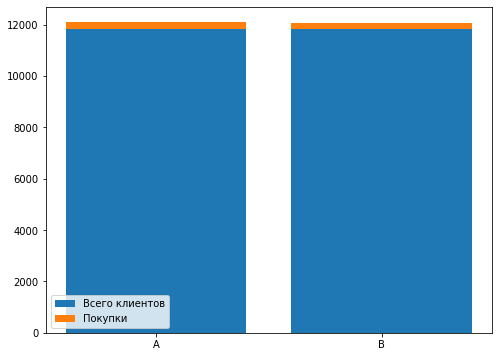

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar([1, 2], grouped['count']['purchase'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['purchase'], bottom=grouped['count']['purchase'], label='Покупки')
plt.xticks([1, 2], ['A', 'B'])
plt.legend();

давайте сразу же и непараметрический критерий посмотрим (хи-квадрат)

In [ ]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=0.975 pvalue=0.323


**Что насчет других метрик?**

Посмотрим на выручку в двух группах. Если захотим пользоваться параметрическим критерием T-Стьюдента, то нужно для начала убедиться, что распределение у признака нормальное - это можно сделать с помощью критерия Шапиро-Уилка.

In [ ]:
from scipy.stats import shapiro

shapiro(data['revenue'])

ShapiroResult(statistic=0.011638760566711426, pvalue=0.0)

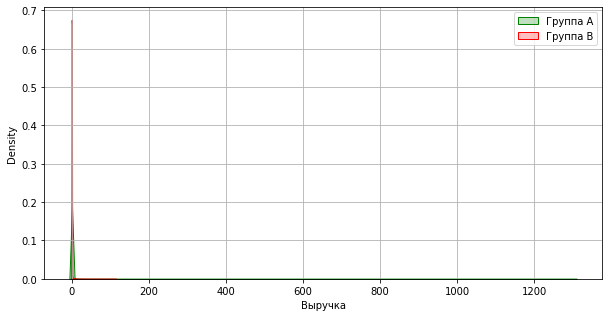

In [ ]:
import seaborn as sns

data_revenue = data[['revenue', 'ab_group']]
data_revenue_A = data_revenue[data_revenue['ab_group'] == 'A']['revenue']
data_revenue_B = data_revenue[data_revenue['ab_group'] == 'B']['revenue']

plt.figure(figsize=(10, 5))

sns.kdeplot(data_revenue_A, shade=True, label='Группа А', color='g')
sns.kdeplot(data_revenue_B, shade=True, label='Группа B', color='r')

plt.xlabel('Выручка')
plt.legend()
plt.grid()
plt.show()

Критерий мана-уитни для среднего чека (z-критерий уже не годится)

In [ ]:
data.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


Мы видим, что вроде бы различия серьезные, но понимаем при этом, что все дело скорее всего в выбросах (а среднее у нас к ним не очень устойчиво)

In [ ]:
from scipy.stats import mannwhitneyu

mw_stats = mannwhitneyu(x=data[data['ab_group'] == 'A']['revenue'].values,
                        y=data[data['ab_group'] == 'B']['revenue'].values)

mw_stats

MannwhitneyuResult(statistic=70054756.0, pvalue=0.3243889561742552)

Критерий Манна-Уитни нам <b>не позволяет</b> принять альтернативную гипотезу о разнице arpu

Может быть среднее количество покупок на пользователя отличается?

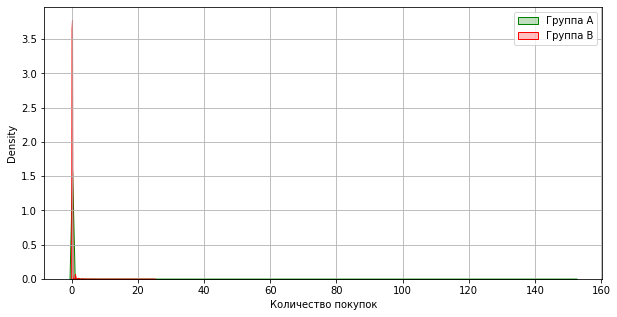

In [ ]:
data_num_purchases = data[['num_purchases', 'ab_group']]
data_num_purchases_A = data_num_purchases[data_num_purchases['ab_group'] == 'A']['num_purchases']
data_num_purchases_B = data_num_purchases[data_num_purchases['ab_group'] == 'B']['num_purchases']

plt.figure(figsize=(10, 5))

sns.kdeplot(data_num_purchases_A, shade=True, label='Группа А', color='g')
sns.kdeplot(data_num_purchases_B, shade=True, label='Группа B', color='r')

plt.xlabel('Количество покупок')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mw_stats = mannwhitneyu(x=data[data['ab_group'] == 'A']['num_purchases'].values,
                        y=data[data['ab_group'] == 'B']['num_purchases'].values)
mw_stats

MannwhitneyuResult(statistic=70054599.0, pvalue=0.3249718497892071)

Давайте еще посмотрим на arppu (average revenue per paying user)

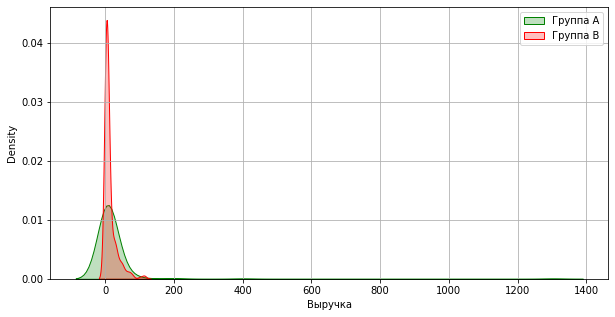

In [ ]:
data_revenue = data[['revenue', 'ab_group']][data['purchase'] == 1]
data_revenue_A = data_revenue[data_revenue['ab_group'] == 'A']['revenue']
data_revenue_B = data_revenue[data_revenue['ab_group'] == 'B']['revenue']

plt.figure(figsize=(10, 5))

sns.kdeplot(data_revenue_A, shade=True, label='Группа А', color='g')
sns.kdeplot(data_revenue_B, shade=True, label='Группа B', color='r')

plt.xlabel('Выручка')
plt.legend()
plt.grid()
plt.show()

In [ ]:
mw_stats = mannwhitneyu(x=data[(data['ab_group'] == 'A')&(data['purchase'] == 1)]['revenue'].values,
                        y=data[(data['ab_group'] == 'B')&(data['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

In [ ]:
data[data['purchase'] == 1].groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,256.0,18.698469,87.527589,0.259689,2.318301,4.28316,11.923141,1303.609284
B,234.0,12.362119,19.007065,0.259373,2.319883,3.98000,12.274829,113.830000


##### Выводы:

1. ни по одной из метрик мы не видим значимых различий
2. скорее всего слишком мало данных для выводов

Размер выборки:

Параметры (Пример):

базовая конверсия p=0.14

мы ожидаем увеличение конверсии хотя бы на 10% (относительно), иначе изменение для нас неоправдывается по тем или иным причинам

https://www.hackdeploy.com/learn-what-is-statistical-power-with-python/ - еще про мощность теста и размер выборки

statsmodels.stats.power.tt_ind_solve_power(effect_size=None, nobs1=None, alpha=None, power=None, ratio=1.0, alternative='two-sided')


Из statsmodels.stats.power tt_ind_solve_power определит необходимый параметр, если его передать как None


effect_size - стандартизированный размер эффекта, разница между двумя средними значениями, деленная на стандартное отклонение. effect_size >0.

nobs1 - количество наблюдений в выборке 1. Количество наблюдений в выборке два равно  nobs2 = nobs1 * ratio

alpha из (0,1) - уровень значимости, например 0,05, - это вероятность ошибки типа I, то есть ошибочного отклонения, если нулевая гипотеза верна.

power из (0,1) - мощность теста, например 0,8, равна единице минус вероятность ошибки типа II. Мощность - это вероятность того, что тест правильно отвергнет нулевую гипотезу, если альтернативная гипотеза верна.

ratio - отношение количества наблюдений в выборке 2 по отношению к выборке 1. см. описание nobs1. По умолчанию отношение равно 1; чтобы найти коэффициент с учетом других аргументов, он должен быть явно установлен на None.

alternative, 'two-sided' - «двусторонний» ( default), "односторонние" -  ‘larger’, ‘smaller’  , дополнительный аргумент для выбора, рассчитывается ли мощность для двустороннего (по умолчанию) или одностороннего теста.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power
p = 0.05
min_effect = 0.05
from statsmodels.stats.power import tt_ind_solve_power

tt_ind_solve_power(effect_size=p*min_effect/0.05, nobs1 = 1000, alpha=None, power=0.8, ratio=1, alternative='two-sided')

0.642204970269651

## Практика

Постановка задачи:

- Есть отток
- можно бороться с оттоком рассылая предложения по тарифу
- Коммуникации проходят по случайной выборке клиентов (если это отток, то делаем предложение в объеме, которое примет 50% клиентов)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix
from scipy.stats import mannwhitneyu
import itertools

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1CCv4HkNsIKJDG1PGN9vKI_kNGvUZUFjd' -O churn_data.csv

--2022-08-26 18:25:29--  https://drive.google.com/uc?export=download&id=1CCv4HkNsIKJDG1PGN9vKI_kNGvUZUFjd
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.113, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9v7ccv3gs0h2t706mbr25gf06n5rftu6/1661538300000/14165537686129864864/*/1CCv4HkNsIKJDG1PGN9vKI_kNGvUZUFjd?e=download&uuid=23f2722d-673d-419d-b9db-51aac356e551 [following]
--2022-08-26 18:25:29--  https://doc-0k-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9v7ccv3gs0h2t706mbr25gf06n5rftu6/1661538300000/14165537686129864864/*/1CCv4HkNsIKJDG1PGN9vKI_kNGvUZUFjd?e=download&uuid=23f2722d-673d-419d-b9db-51aac356e551
Resolving doc-0k-94-docs.googleusercontent.com (doc-0k-94-docs.googleusercontent.com)... 74.125.135.132, 2607:

In [ ]:
df = pd.read_csv("churn_data.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Exited'],axis=1), df['Exited'], random_state=2) # X_test для А/В
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=2)# X_val - наш внутренний тест

In [ ]:
# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]


class OHEEncoderBin(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        B = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        self.columns = B[:1]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
    
        return X[self.columns]  


class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key, p=2):
        self.key = key
        self.columns = []
        self.p = p+1

    def fit(self, X, y=None):
        B = [self.key + str(i) for i in range(1, self.p)]
        self.columns = B + ['log']
        return self

    def transform(self, X):
        Xp = X.values.reshape(-1,1)
        for i in range(2, self.p):
            Xp = np.hstack([Xp,(X.values.reshape(-1,1) ** i).astype(float)])

        Xp = np.hstack([Xp, np.log(X.values.reshape(-1,1) + 1).astype(float)])    
        B = pd.DataFrame(data = Xp, index = X.index, columns =[self.columns] )
        return B[self.columns]     

Проверяем состав и пропуски:

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 7914 to 4994
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        5625 non-null   int64  
 1   CustomerId       5625 non-null   int64  
 2   Surname          5625 non-null   object 
 3   CreditScore      5625 non-null   int64  
 4   Geography        5625 non-null   object 
 5   Gender           5625 non-null   object 
 6   Age              5625 non-null   int64  
 7   Tenure           5625 non-null   int64  
 8   Balance          5625 non-null   float64
 9   NumOfProducts    5625 non-null   int64  
 10  HasCrCard        5625 non-null   int64  
 11  IsActiveMember   5625 non-null   int64  
 12  EstimatedSalary  5625 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 615.2+ KB


Смотрим статистики на выбросы:

In [ ]:
X_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,5625.000000,5.625000e+03,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,5010.659378,1.569099e+07,651.367111,38.961956,5.036978,76976.936306,1.529067,0.706311,0.518044,100029.061995
std,2885.589113,7.212504e+04,96.316214,10.587993,2.910113,62075.983617,0.582689,0.455492,0.499719,57838.075841
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,178.190000
25%,2543.000000,1.562858e+07,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50454.800000
50%,5018.000000,1.569067e+07,652.000000,37.000000,5.000000,98382.720000,1.000000,1.000000,1.000000,99800.870000
75%,7519.000000,1.575401e+07,718.000000,44.000000,8.000000,127450.140000,2.000000,1.000000,1.000000,149471.130000
max,9998.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199970.740000


In [ ]:
X_train.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7914,7915,15777179,Ellis,687,France,Male,35,9,0.00,2,0,1,73133.82
8546,8547,15686957,Piccio,553,Germany,Male,35,2,158584.28,2,1,0,43640.16
2070,2071,15750684,Jibunoh,719,France,Female,42,4,0.00,1,1,0,28465.86


In [ ]:
X_train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

Проверим визуально сходство распределений по всем подвыборкам:

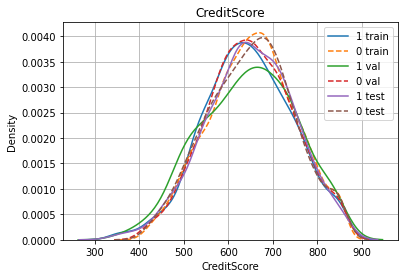

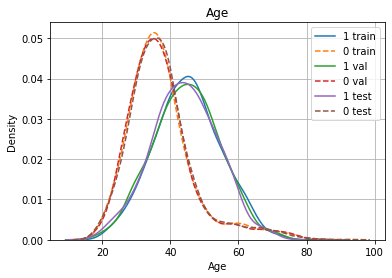

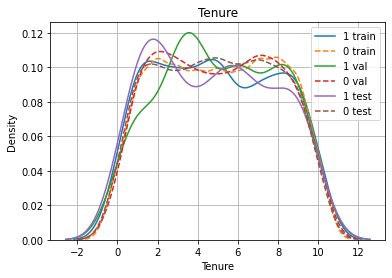

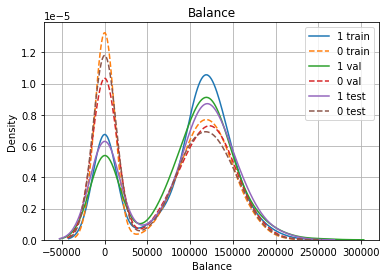

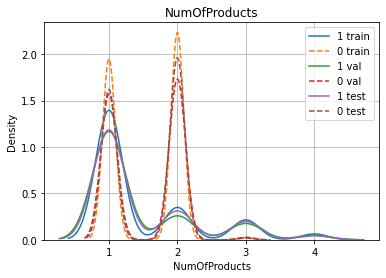

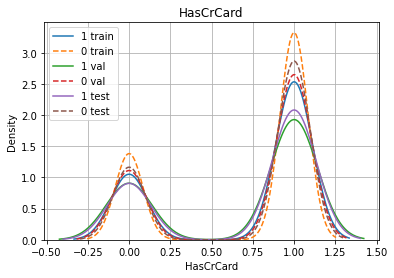

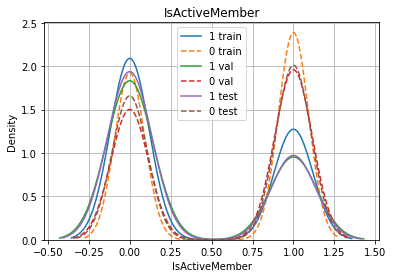

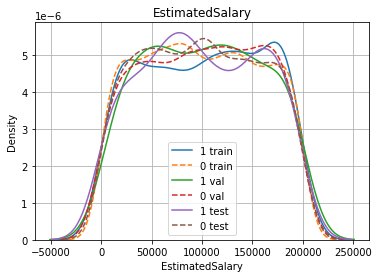

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    sns.kdeplot(X_train.loc[y_train == 1,i], label='1 train')
    sns.kdeplot(X_train.loc[y_train == 0,i], ls='--', label='0 train')
    
    sns.kdeplot(X_val.loc[y_val == 1,i], label='1 val')
    sns.kdeplot(X_val.loc[y_val == 0,i], ls='--', label='0 val')
    
    sns.kdeplot(X_test.loc[y_test == 1,i], label='1 test')
    sns.kdeplot(X_test.loc[y_test == 0,i], ls='--', label='0 test')
    plt.title(i)
    plt.grid()
    plt.legend()
    plt.show()        

In [ ]:
categorical_col =  ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember']

for i in categorical_col:
    print(i,' число уникальных значений: ', len(pd.unique(X_train[i])), 'уникальные значения', pd.unique(X_train[i]))

Geography  число уникальных значений:  3 уникальные значения ['France' 'Germany' 'Spain']
Gender  число уникальных значений:  2 уникальные значения ['Male' 'Female']
HasCrCard  число уникальных значений:  2 уникальные значения [0 1]
IsActiveMember  число уникальных значений:  2 уникальные значения [1 0]


Проверим статистику сходства распределений :

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    tr_v_stats = mannwhitneyu(X_train.loc[y_train == 1, i], X_val.loc[y_val == 1, i])
    tr_test_stats = mannwhitneyu(X_train.loc[y_train == 1, i], X_test.loc[y_test == 1, i])
    print(i, ':', tr_v_stats[1], ':', tr_test_stats[1])

CreditScore : 0.7866232465689624 : 0.3034641000707645
Age : 0.6279617228753334 : 0.16166797796336407
Tenure : 0.37488236053626833 : 0.2971971462926689
Balance : 0.6323673530278513 : 0.48079658953140836
NumOfProducts : 0.5757409273252094 : 0.8173702565186527
HasCrCard : 0.312717127876865 : 0.6921390798187875
IsActiveMember : 0.19577064636885733 : 0.08750544277909324
EstimatedSalary : 0.9275385914299212 : 0.5050647781479354


Собираем пайплайн обработки:

In [ ]:
categorical_columns = ['Geography']
continuous_columns = ['CreditScore','Tenure', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_bin_columns = ['Gender',  'HasCrCard', 'IsActiveMember']


from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

gender = Pipeline([
                ('selector', FeatureSelector(column='Gender')),
                ('ohe', OHEEncoderBin(key='Gender'))
            ])

gender.fit(X_train)
gender.transform(X_test).head(3)

,Gender_Female
7878,1
3224,1
1919,0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

geography = Pipeline([
                ('selector', FeatureSelector(column='Geography')),
                ('ohe', OHEEncoder(key='Geography'))
            ])
geography.fit(X_train)
geography.transform(X_test).head(3)

,Geography_France,Geography_Germany,Geography_Spain
7878,1,0,0
3224,0,1,0
1919,1,0,0


In [ ]:
Age = Pipeline([
                ('selector', FeatureSelector(column='Age')),
                ('ohe', NumericPower(key='Age', p=3))
            ])

Age.fit(X_train)
print(Age.transform(X_test).head(3))

      Age1    Age2      Age3       log
7878  38.0  1444.0   54872.0  3.663562
3224  41.0  1681.0   68921.0  3.737670
1919  56.0  3136.0  175616.0  4.043051


In [ ]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))


for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('pow_2', NumericPower(key=cont_col, p=3)),
                ('Scale', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))


for bin_col in categorical_bin_columns:
    bin_transformer = Pipeline([
                ('selector', FeatureSelector(column=bin_col)),
                ('ohe', OHEEncoderBin(key=bin_col))
            ])
    final_transformers.append((bin_col, bin_transformer))

In [ ]:
final_transformers

[('Geography',
  Pipeline(steps=[('selector', FeatureSelector(column='Geography')),
                  ('ohe', OHEEncoder(key='Geography'))])),
 ('CreditScore',
  Pipeline(steps=[('selector', NumberSelector(key='CreditScore')),
                  ('pow_2', NumericPower(key='CreditScore', p=4)),
                  ('Scale', StandardScaler())])),
 ('Tenure', Pipeline(steps=[('selector', NumberSelector(key='Tenure')),
                  ('pow_2', NumericPower(key='Tenure', p=4)),
                  ('Scale', StandardScaler())])),
 ('Age', Pipeline(steps=[('selector', NumberSelector(key='Age')),
                  ('pow_2', NumericPower(key='Age', p=4)),
                  ('Scale', StandardScaler())])),
 ('Balance', Pipeline(steps=[('selector', NumberSelector(key='Balance')),
                  ('pow_2', NumericPower(key='Balance', p=4)),
                  ('Scale', StandardScaler())])),
 ('NumOfProducts',
  Pipeline(steps=[('selector', NumberSelector(key='NumOfProducts')),
                  ('po

Добавляем классификатор:

In [ ]:
feats = FeatureUnion(final_transformers)

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])

In [ ]:
# обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Geography',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Geography')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Geography'))])),
                                                ('CreditScore',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='CreditScore')),
                                                                 ('pow_2',
                                                                  NumericPower(key='CreditScore',
                                                                               p=4)),
                                                    

In [ ]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_val)[:, 1]
preds[:10]

array([0.62, 0.3 , 0.01, 0.  , 0.04, 0.18, 0.05, 0.53, 0.15, 0.01])

КАлибруем модель:

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))


Best Threshold=0.320000, F-Score=0.599, Precision=0.571, Recall=0.630


Confusion matrix, without normalization
[[1281  191]
 [ 149  254]]


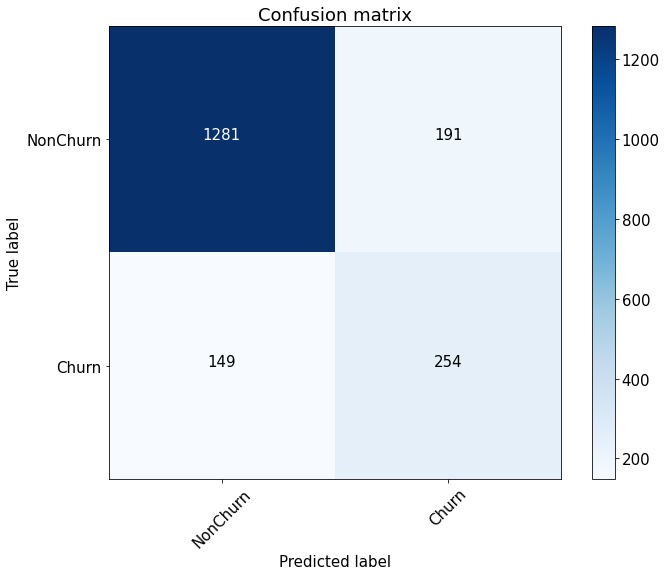

In [ ]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_val, preds >= thresholds[ix])
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
# Конверсия

TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]

C0 = (TP + FN) / np.sum(cnf_matrix)
C0

0.21493333333333334



Начинаем A/B тест:

базовая конверсия 0.214<br>

Разбиваем тестовый набор на 2 группы: контрольную и рабочую:

In [ ]:
X_test.shape

(2500, 13)

In [ ]:
X_A, X_B, y_A, y_B = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

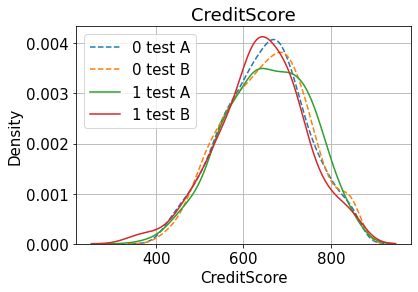

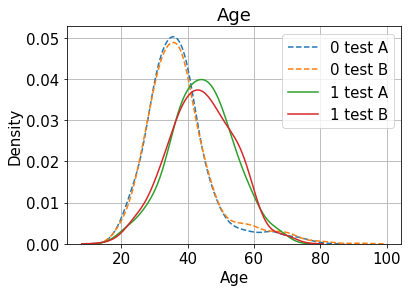

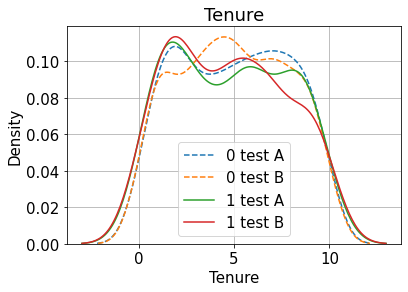

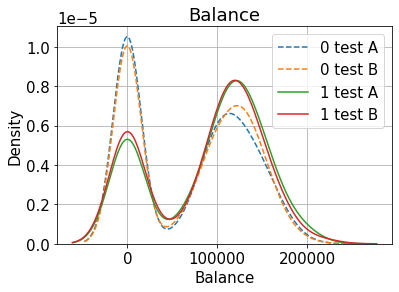

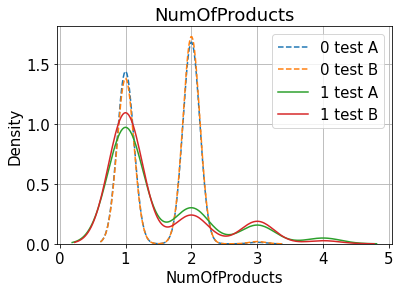

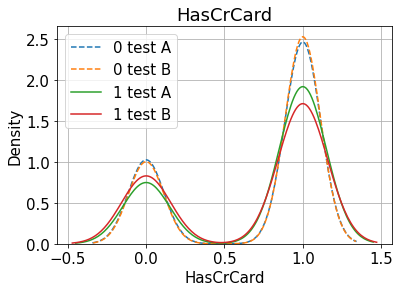

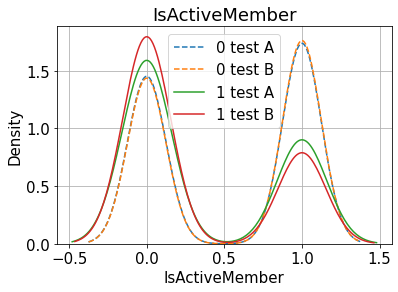

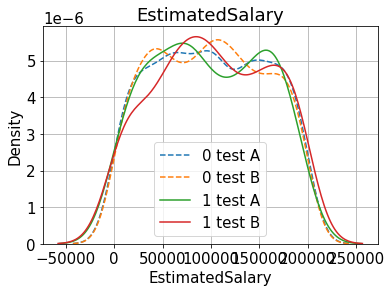

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:, 2:].select_dtypes(include=numerics).columns:
    sns.kdeplot(X_A.loc[y_A == 0,i], ls='--', label='0 test A')
    sns.kdeplot(X_B.loc[y_B == 0,i], ls='--', label='0 test B')
    
    sns.kdeplot(X_A.loc[y_A == 1,i], label='1 test A')
    sns.kdeplot(X_B.loc[y_B == 1,i], label='1 test B')
    plt.title(i)
    plt.grid()
    plt.legend()
    plt.show() 

Применяем модель к группе В:

In [ ]:
predsB = pipeline.predict_proba(X_B)[:, 1]
cnf_matrix = confusion_matrix(y_B, predsB > thresholds[ix])

TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]
print(cnf_matrix)

[[912  99]
 [ 89 150]]


In [ ]:
churn_ef = 0.5  # Снижение эффективности предсказания за счет не полного действия мер по борьбе с оттоком
C0_A = (np.sum(y_A)) / y_A.shape[0] # churn rate (коэффициента оттока клиентов) без ML
print(C0_A)
C1_MLB = (FN + (1-churn_ef) * TP) / np.sum(cnf_matrix) # churn rate (коэффициента оттока клиентов) при ML
print(C1_MLB)

0.1968
0.1312


In [ ]:
y_churnA = y_A

y_pred = (predsB > thresholds[ix])
ind_churn = np.where((y_pred != y_B) & (y_B == 1))
y_churnB = np.zeros(y_B.shape)
y_churnB[ind_churn] = 1


k1, n1 = np.sum(y_A), y_A.shape[0]
k2, n2 = np.sum(y_churnB), y_churnB.shape[0]
k1, k2, n1, n2

(246, 89.0, 1250, 1250)

In [ ]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                 np.array([n1, n2]))

print(f'Results are z_score={z_score:.3f} pvalue={z_pvalue:.3f}')

Results are z_score=9.218 pvalue=0.000


In [ ]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                        np.array([n1, n2]))

print(f'Results are chisq={chisq:.3f} pvalue={pvalue:.3f}')

Results are chisq=84.964 pvalue=0.000


Ссылки:

1. https://ami.nstu.ru/~headrd/seminar/publik_html/Statistical_Data_Analysis.pdf - книга 2011 статистические тесты компьютерный подход - описаны и исследованы все мыслимые разновидности - справочник - сложный

2. https://isma.ivanovo.ru/attachments/46682 - работа со стат.критерием - очень понятно
3. https://www.machinelearningmastery.ru/statistical-hypothesis-tests-in-python-cheat-sheet/ - Краткое руководство по 15 тестам статистических гипотез для прикладных целей, с примером кода на Python.
4. https://www.machinelearningmastery.ru/a-gentle-introduction-to-normality-tests-in-python/ - тест нормальности Python

### Домашнее задание

Взять датасет из google диска: https://drive.google.com/file/d/101fYypHh0u56KC5Lq2ywOCOdnh7WPho2/view?usp=sharing. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=101fYypHh0u56KC5Lq2ywOCOdnh7WPho2' -O data.zip

--2022-07-14 19:00:34--  https://drive.google.com/uc?export=download&id=101fYypHh0u56KC5Lq2ywOCOdnh7WPho2
Resolving drive.google.com (drive.google.com)... 172.253.117.101, 172.253.117.139, 172.253.117.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.117.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/63d6fku32s6gj387qvf6ftekfah6m0f1/1657825200000/14165537686129864864/*/101fYypHh0u56KC5Lq2ywOCOdnh7WPho2?e=download&uuid=951a27ec-7c5a-45ca-ba79-f1fc2d48f663 [following]
--2022-07-14 19:00:35--  https://doc-14-94-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/63d6fku32s6gj387qvf6ftekfah6m0f1/1657825200000/14165537686129864864/*/101fYypHh0u56KC5Lq2ywOCOdnh7WPho2?e=download&uuid=951a27ec-7c5a-45ca-ba79-f1fc2d48f663
Resolving doc-14-94-docs.googleusercontent.com (doc-14-94-docs.googleusercontent.com)... 74.125.195.132, 2

In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: marketing description.txt  
  inflating: marketing_campaign.csv  
  inflating: subscribers.csv         
  inflating: users.csv               


In [ ]:
import pandas as pd

In [ ]:
marketing_campaign = pd.read_csv('marketing_campaign.csv')
marketing_campaign

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [ ]:
marketing_campaign.variant.value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [ ]:
marketing_campaign.converted.value_counts()

False    8946
True     1076
Name: converted, dtype: int64

Дополнение:

Альтернатива А/В тестам - "Многорукий бандинт"

Классические методологии A/B тестирования предполагают равномерное распределение трафика между двумя вариациями (50 на 50). Многорукие бандиты позволяют распределять трафик динамически: более эффективные вариации со временем получают больше трафика, а менее эффективные — меньше. Многорукие бандиты быстрее приносят результат, потому что не нужно дожидаться определения единственного победителя

<img src='https://drive.google.com/uc?export=view&id=13nVxb_2Tx3ICkUXY0NdyP5L7Z2-NvHfP' width=1000>

Вопросы:

А. Зачем делаем тест:

  1. Это обязательный элемент отчета
  2. хотим убедиться, что модель работает как предполагалось
  3. хотим убедиться , что конверсия при использовании модели, растет

В. Что проверяем при составлении программы эксперимента:

  1. Число доступных примеров
  2. Объем ресурсов для работы модели
  3. Целевой уровень значимости

С. Когда не делаем А/В тест:

  1. мало примеров для работы
  2. нет времени
  3. нет денег